# Analisando os Sentimentos na Discografia de Harry Styles

A análise de sentimento em músicas é uma técnica que busca identificar e interpretar as emoções expressas nas letras das canções. Esse tipo de análise utiliza algoritmos e modelos de aprendizado de máquina, como o processamento de linguagem natural (PLN), para avaliar as palavras e frases contidas nas letras, classificando-as em categorias como positivo, negativo ou neutro.

As letras de músicas são ricas em emoção e podem refletir uma ampla gama de sentimentos, como amor, tristeza, alegria, raiva e nostalgia. A análise de sentimento permite que artistas, produtores e ouvintes compreendam melhor como a música pode impactar as emoções humanas e a percepção do público.

Com o avanço das tecnologias de inteligência artificial e processamento de linguagem natural, a análise de sentimento em músicas está se tornando cada vez mais sofisticada, permitindo uma compreensão mais profunda e complexa das emoções humanas expressas através da arte musical.

Na análise de sentimento em músicas, várias bibliotecas de programação são frequentemente utilizadas para facilitar o processamento de dados e a interpretação das emoções expressas nas letras.

In [1]:
# Importando bibliotecas
import pandas as pd 
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

In [9]:
# Leitura dos Arquivos
df=pd.read_csv("Arquivos Gerados/HarryStylesLyrics.csv")
df

,title,lyrics,release_date,Album,release_year,Word Count
0,Sign of the Times,just stop crying sign times welcome final show...,2017-04-07,Harry Styles,2017,183
1,As It Was,come harry wanna goodnight holdin back gravit...,2022-04-01,Harry’s House,2022,97
2,Watermelon Sugar,tastes like strawberries summer evenin sounds ...,2019-11-16,Fine Line,2019,173
3,Falling,here there blame drink wandering hands forget ...,2019-12-13,Fine Line,2019,118
4,Adore You,harry styles walk rainbow paradise paradise st...,2019-12-06,Fine Line,2019,162
5,Fine Line,price emotion looking something devotion hate ...,2019-12-13,Fine Line,2019,94
6,Matilda,riding bike sound deal trying lift ground whee...,2022-05-20,Harry’s House,2022,139
7,Kiwi,worked cheap pack cigarettes hard liquor mixed...,2017-05-12,Harry Styles,2017,151
8,Cherry,camille rowe coucou harry styles call baby ta...,2019-12-13,Fine Line,2019,103
9,Lights Up,what mean sorry never coming back down could w...,2019-10-11,Fine Line,2019,91


In [15]:
# Lista de palavras indesejadas presentes na discografia de Harry Styles
indesejadas = ['ta', 'na', 'yeah', 'ba']

# Remove palavras indesejadas, e salva de volta como um texto longo
df['lyrics'] = df['lyrics'].apply(lambda x: ' '.join([palavra for palavra in x.split() if palavra not in (indesejadas)]))

# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df['lyrics'])
palavras = word_tokenize(text)

print("Existem {} palavras no dataset de letras do Harry Styles.".format(len(palavras)))
print("Existem {} palavras únicas no dataset de letras do Harry Styles.".format(len(set(palavras))))

Existem 3634 palavras no dataset de letras do Harry Styles.
Existem 837 palavras únicas no dataset de letras do Harry Styles.


In [16]:
# Importa a classe FreqDist da biblioteca nltk, que é usada para calcular a frequência de distribuição de palavras
from nltk.probability import FreqDist

# Tokeniza o texto, dividindo-o em palavras individuais
words = word_tokenize(text)

# Cria uma distribuição de frequência das palavras no texto
fdist = FreqDist(words)

# Exibe as 3 palavras mais comuns no texto, juntamente com suas contagens
fdist.most_common(3)

[('know', 111), ('like', 66), ('na', 46)]

<div class="alert alert-block alert-info"
     <b> Know, like e na foram as 3 palavras mais presentes na discografia de Harry Styles. </b>
</div>

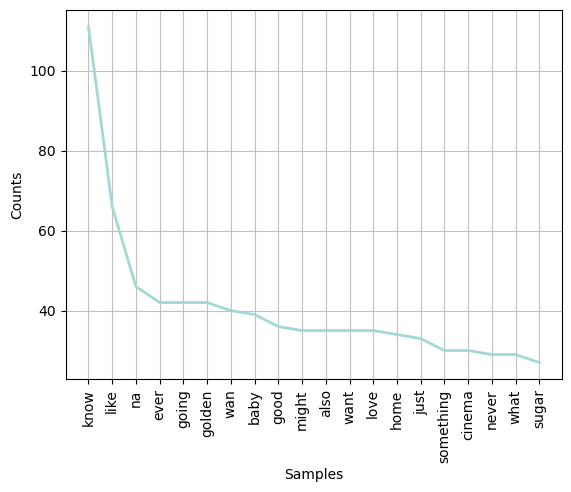

In [17]:
# Plota o gráfico de distribuição de frequência das 20 palavras mais comuns
# 'cumulative=False' indica que não será um gráfico acumulativo
# 'color' define a cor das barras no gráfico
fdist.plot(20, cumulative=False, color='#A3D9D3')

# Exibe o gráfico gerado na tela
plt.show()

<div class="alert alert-block alert-info"
     <b> O gráfico mostra as 20 palavras mais usadas nas composições do artista em ordem de frequência. </b>
</div>

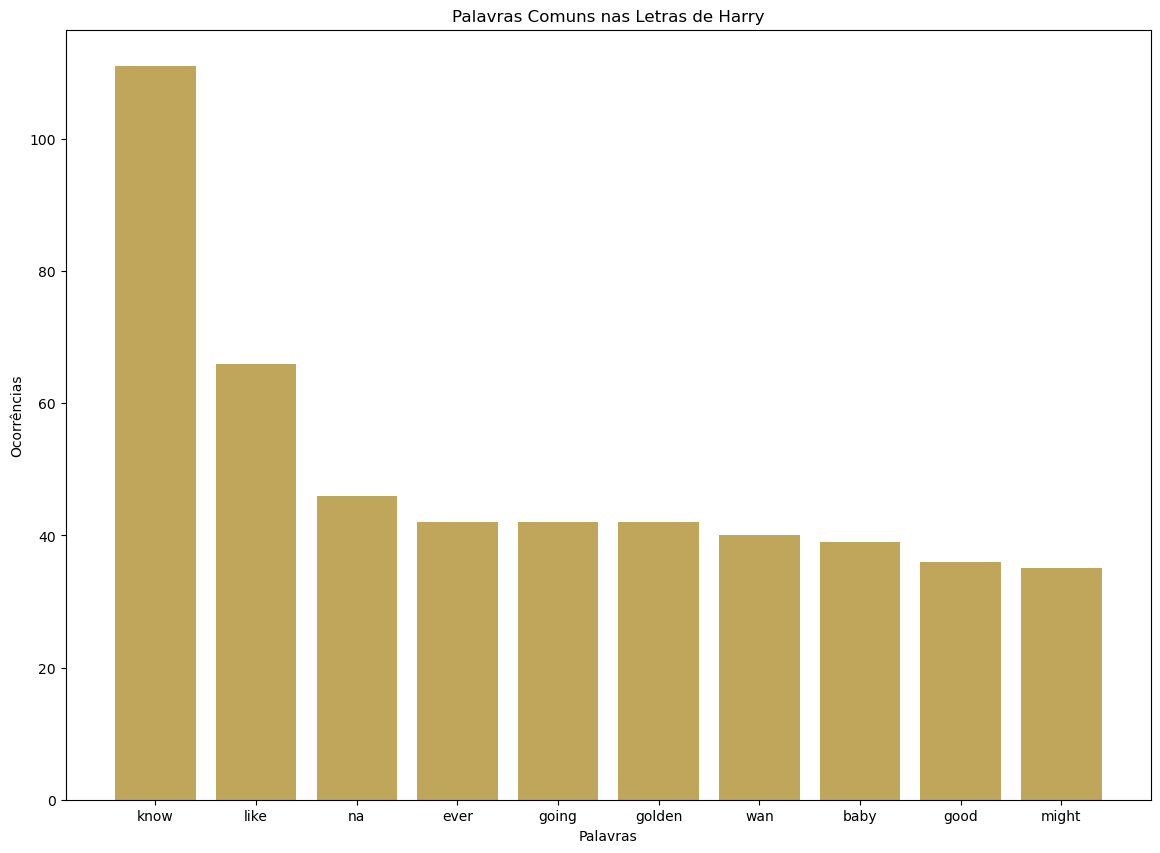

In [18]:
# Gráfico de barras das palavras mais comuns
# Extrai as 10 palavras mais comuns (x) e suas frequências (y) da distribuição de frequência
x, y = zip(*fdist.most_common(10))

# Define o tamanho da figura do gráfico
plt.figure(figsize=(14, 10))

# Cria o gráfico de barras com as palavras mais comuns; 'color' permite escolher a cor das barras
plt.bar(x, y, color='#BFA65A')

# Configura o título e os rótulos dos eixos do gráfico
plt.title("Palavras Comuns nas Letras de Harry")
plt.xlabel('Palavras')
plt.ylabel('Ocorrências')

# Exibe o gráfico
plt.show()

<div class="alert alert-block alert-info"
     <b> O gráfico mostra as 10 palavras mais usadas nas composições do artista em ordem de ocorrências. </b>
</div>

In [19]:
# Importa a classe SentimentIntensityAnalyzer do módulo nltk.sentiment
# Essa classe permite calcular a intensidade do sentimento de um texto
from nltk.sentiment import SentimentIntensityAnalyzer

# Cria uma instância do SentimentIntensityAnalyzer para analisar o sentimento
analyzer = SentimentIntensityAnalyzer()

# Analisa o sentimento de todas as letras juntas
# O método polarity_scores(text) retorna um dicionário com as pontuações de sentimento: 
# 'neg' para negativo, 'neu' para neutro, 'pos' para positivo e 'compound' para uma pontuação geral
analyzer.polarity_scores(text)

{'neg': 0.125, 'neu': 0.657, 'pos': 0.218, 'compound': 0.9999}

<div class="alert alert-block alert-info"
     <b> Com base nessas pontuações, podemos concluir que a discografia de Harry Styles tem uma predominância de sentimentos neutros, mas ainda expressa emoções positivas significativas, enquanto os sentimentos negativos são relativamente baixos. A pontuação composta sugere que, em geral, a análise vê a discografia como bastante positivo. </b>
</div>

In [20]:
# Análise de sentimento para cada música

# Define uma função para obter o sentimento de cada letra individualmente
def fetch_sentiment(x):
    # Calcula as pontuações de sentimento para a letra da música (x)
    polarity = analyzer.polarity_scores(x)
    # Retorna 'neg' se o sentimento negativo for maior que o positivo; caso contrário, retorna 'pos'
    return 'neg' if polarity['neg'] > polarity['pos'] else 'pos'

# Aplica a função fetch_sentiment a cada letra da coluna 'lyrics' e conta as ocorrências de 'pos' e 'neg'
sentiment = df['lyrics'].apply(lambda x: fetch_sentiment(x)).value_counts()

# Exibe o resultado da contagem de sentimentos positivos e negativos
sentiment

pos    27
neg     8
Name: lyrics, dtype: int64

<div class="alert alert-block alert-info"
     <b> O resultado pode indicar que a maioria das letras da discografia do cantor tende a transmitir emoções positivas, o que pode ser um reflexo do tema adotado em cada era ou da intenção do autor no geral em suas composições. </b>
</div>

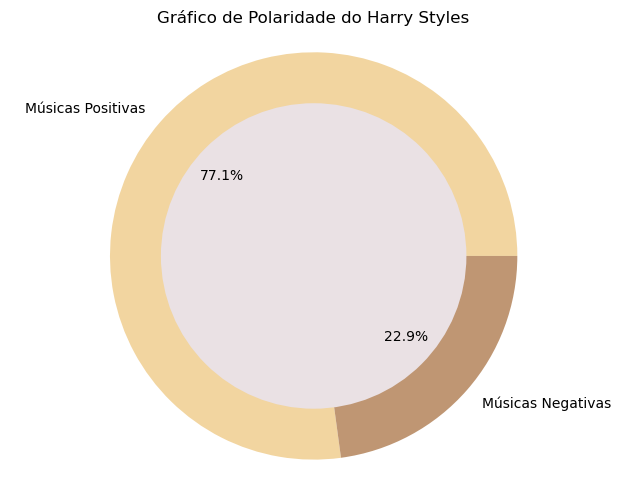

In [23]:
#Plotando os sentimentos
label = 'Músicas Positivas','Músicas Negativas'
color = ['#F2D5A0', '#BF9673']

plt.pie(sentiment, labels=label, autopct='%1.1f%%', colors=color)

#draw center circle hole
cc = plt.Circle((0,0),0.75,fc='#EAE1E4')
fig = plt.gcf()
fig.gca().add_artist(cc)

#display
plt.tight_layout()
plt.title('Gráfico de Polaridade do Harry Styles')
plt.axis('equal')
plt.show()

Index(['title', 'lyrics', 'release_date', 'Album', 'release_year',
       'Word Count'],
      dtype='object')


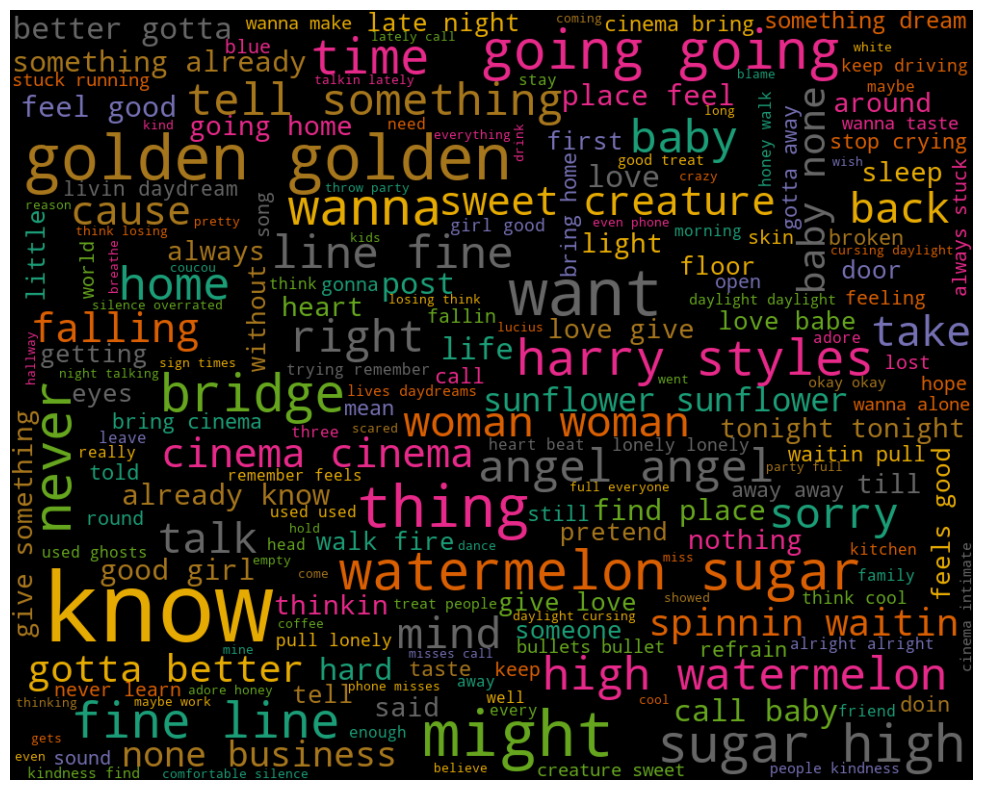

In [10]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Exibir os nomes das colunas do DataFrame
print(df.columns)

# Verifica se a coluna 'Lyrics' existe
if 'lyrics' in df.columns:
    # Verifica se não há valores nulos na coluna 'Lyrics'
    df['lyrics'] = df['lyrics'].fillna('')  # Substitui valores nulos por string vazia
    text = " ".join(twt for twt in df['lyrics'])

    # Gerando a nuvem de palavras
    wc = WordCloud(
        width=1000,
        height=800,
        random_state=21,
        max_font_size=100,
        relative_scaling=0.5,
        colormap='Dark2'
    ).generate(text)

    # Exibindo a nuvem de palavras
    plt.figure(figsize=(14, 10))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()
else:
    print("A coluna 'Lyrics' não foi encontrada no DataFrame.")

<div class="alert alert-block alert-info"
     <b> A nuvem de palavras acima representa a discografia em relação a sua frequência de termos mais usados, quanto maior o tamanho da palavra, mais presente ela se encontra nas composições. </b>
</div>

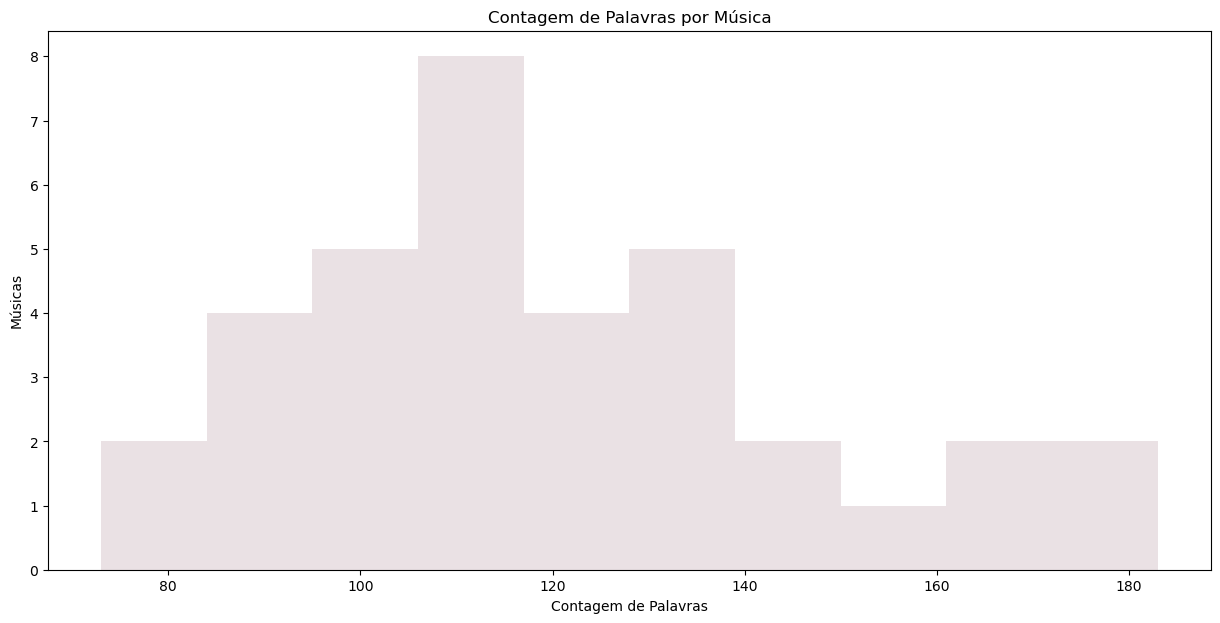

In [24]:
# Define o tamanho da figura do gráfico
plt.figure(figsize=(15, 7))

# Cria um histograma para a coluna 'Word Count' do DataFrame df
# '10' especifica o número de bins (intervalos) no histograma
(n, bins, patches) = plt.hist(df['Word Count'], bins=10, color='#EAE1E4')

# Adiciona rótulo ao eixo x
plt.xlabel('Contagem de Palavras')

# Adiciona rótulo ao eixo y
plt.ylabel('Músicas')

# Adiciona um título ao gráfico
plt.title('Contagem de Palavras por Música')

# Exibe o gráfico
plt.show()

<div class="alert alert-block alert-info"
     <b> O resultado é um histograma que representa a distribuição da contagem de palavras das músicas. Cada barra no histograma mostra quantas músicas caem dentro de cada intervalo de contagem de palavras. Isso permite visualizar rapidamente como as músicas se distribuem em relação à sua contagem de palavras, identificando padrões, como se a maioria das músicas tende a ser mais curtas ou mais longas. </b>
</div>

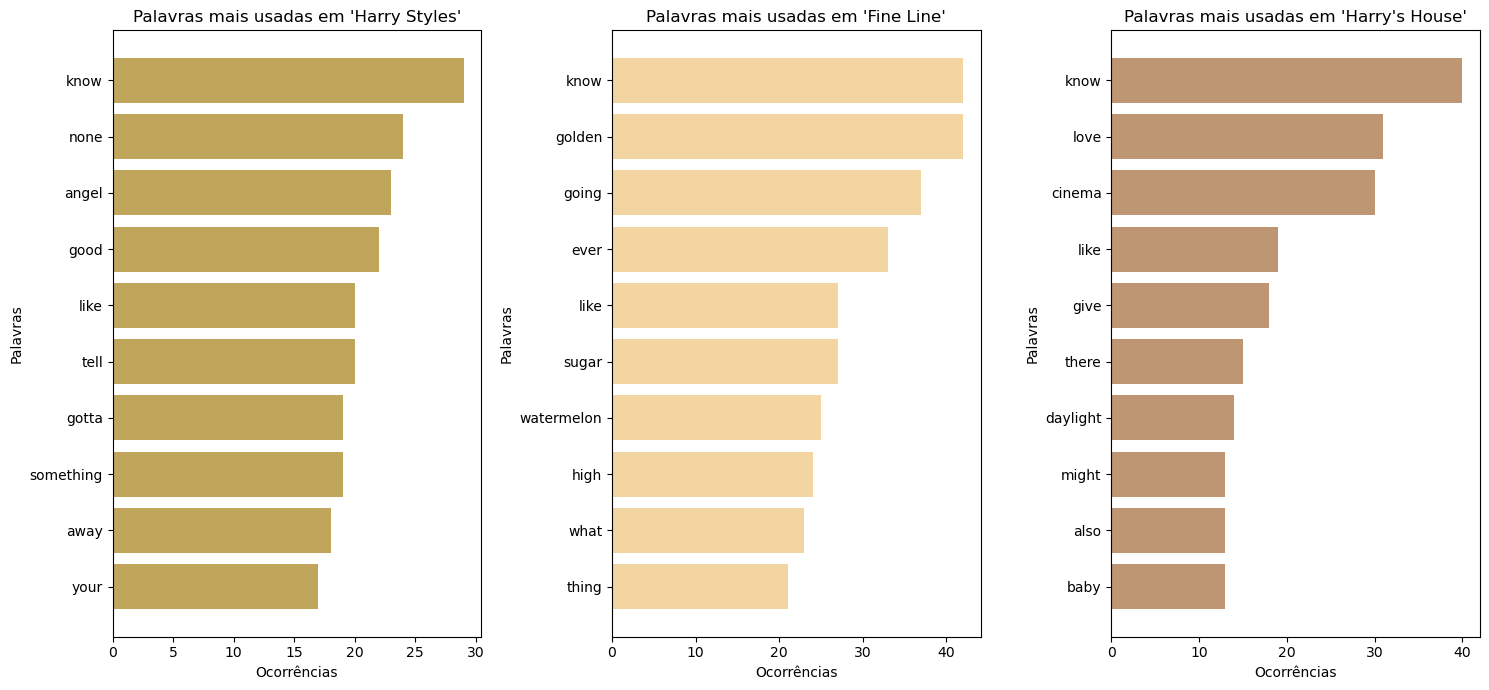

In [25]:
# Dicionários para armazenar as palavras populares de cada ano
popular_words_2017 = dict()
popular_words_2019 = dict()
popular_words_2022 = dict()

# Listas para armazenar as letras de cada ano
l_2017 = []
for row in df[df['release_year'] == 2017].iterrows():
    # Divide as letras em palavras e adiciona à lista l_2017
    l_2017 += row[1]['lyrics'].split(' ')

l_2019 = []
for row in df[df['release_year'] == 2019].iterrows():
    # Divide as letras em palavras e adiciona à lista l_2019
    l_2019 += row[1]['lyrics'].split(' ')

l_2022 = []
for row in df[df['release_year'] == 2022].iterrows():
    # Divide as letras em palavras e adiciona à lista l_2022
    l_2022 += row[1]['lyrics'].split(' ')

# Contagem das palavras para 2017
for word in l_2017:
    if word not in popular_words_2017.keys():
        popular_words_2017[word] = 1
    else:
        popular_words_2017[word] += 1

# Contagem das palavras para 2019
for word in l_2019:
    if word not in popular_words_2019.keys():
        popular_words_2019[word] = 1
    else:
        popular_words_2019[word] += 1

# Contagem das palavras para 2022
for word in l_2022:
    if word not in popular_words_2022.keys():
        popular_words_2022[word] = 1
    else:
        popular_words_2022[word] += 1

# Obtendo as 10 palavras mais populares para cada ano
popular_words_2017_x = sorted(popular_words_2017, key=popular_words_2017.get, reverse=True)[:10][::-1]
popular_words_2019_x = sorted(popular_words_2019, key=popular_words_2019.get, reverse=True)[:10][::-1]
popular_words_2022_x = sorted(popular_words_2022, key=popular_words_2022.get, reverse=True)[:10][::-1]

# Obtendo as contagens para as palavras populares
popular_words_2017_y = [popular_words_2017.get(key) for key in sorted(popular_words_2017, key=popular_words_2017.get, reverse=True)[:10]][::-1]
popular_words_2019_y = [popular_words_2019.get(key) for key in sorted(popular_words_2019, key=popular_words_2019.get, reverse=True)[:10]][::-1]
popular_words_2022_y = [popular_words_2022.get(key) for key in sorted(popular_words_2022, key=popular_words_2022.get, reverse=True)[:10]][::-1]

# Define o tamanho da figura
plt.figure(figsize=(15, 7))

# Subplot 1 para 2017
plt.subplot(1, 3, 1)
plt.barh(popular_words_2017_x, popular_words_2017_y, color='#BFA65A')  # Escolhendo a cor das barras
plt.title("Palavras mais usadas em 'Harry Styles'")
plt.xlabel('Ocorrências')
plt.ylabel('Palavras')

# Subplot 2 para 2019
plt.subplot(1, 3, 2)
plt.barh(popular_words_2019_x, popular_words_2019_y, color='#F2D5A0')  # Escolhendo a cor das barras
plt.title("Palavras mais usadas em 'Fine Line'")
plt.xlabel('Ocorrências')
plt.ylabel('Palavras')

# Subplot 3 para 2022
plt.subplot(1, 3, 3)
plt.barh(popular_words_2022_x, popular_words_2022_y, color='#BF9673')  # Escolhendo a cor das barras
plt.title("Palavras mais usadas em 'Harry's House'")
plt.xlabel('Ocorrências')
plt.ylabel('Palavras')

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Exibe o gráfico
plt.show()

Além da identificação das palavras mais utilizadas nas letras das músicas de Harry Styles, podemos fazer várias deduções com base nos dados apresentados no gráfico:

1. **Termos Repetitivos**: A presença recorrente da palavra "know" sugere que pode haver uma ênfase em temas de conhecimento, compreensão ou relacionamento nas letras. Isso pode indicar que as músicas exploram experiências emocionais e reflexões sobre interações pessoais.


2. **Comparação entre Álbum e Temática**: No álbum **"Harry Styles"**, as palavras como "angel" e "good" podem sugerir um foco em sentimentos mais positivos ou idealizados, talvez relacionados ao amor ou a relações passadas. Já em **"Fine Line"**, palavras como "golden" e "sugar" podem indicar um tom mais otimista ou lúdico, sugerindo experiências felizes e memórias doces, mas também pode haver uma contradição, dado o título do álbum, que sugere uma exploração de dualidades e complexidades emocionais. Por fim, em **"Harry's House"**, a inclusão de palavras como "cinema" e "love" pode sugerir uma reflexão sobre a vida cotidiana, cultura pop e amor, mostrando uma continuidade de temas pessoais e relacionais, mas talvez com uma nova perspectiva.


3. **Evolução do Artista**: Comparando os três álbuns, podemos observar como a escolha das palavras pode refletir a evolução artística de Harry Styles. As palavras escolhidas em cada álbum podem indicar mudanças em seu estilo de escrita, suas experiências de vida e crescimento pessoal como artista.


4. **Impacto da Cultura Pop**: A presença de palavras como "cinema" no álbum "Harry's House" pode refletir uma influência da cultura pop e de elementos visuais na música, o que é relevante na era digital atual, onde vídeos e redes sociais desempenham um papel importante na forma como a música é consumida.


5. **Análise de Público-Alvo**: As palavras e temas abordados podem indicar o público-alvo das músicas. Se certas palavras estão mais associadas a um álbum específico, isso pode sugerir que Harry Styles está tentando se conectar com um determinado grupo demográfico ou emocional.


6. **Sentimentos e Emoções**: O uso de palavras que evocam sentimentos (como "love", "good" e "like") pode indicar que as letras de Harry Styles estão centradas em emoções e experiências pessoais, o que é muitas vezes atraente para os ouvintes.

## TF - IDF

TF-IDF (Term Frequency-Inverse Document Frequency) é uma técnica amplamente utilizada em processamento de linguagem natural e recuperação de informações para avaliar a importância de uma palavra em um documento em relação a um conjunto de documentos (ou corpora). É uma forma de transformar texto não estruturado em uma representação numérica que pode ser utilizada em algoritmos de aprendizado de máquina.

### Componentes do TF-IDF

1. **Frequência do Termo (TF)**: Este componente mede a frequência de uma palavra em um documento específico. Quanto mais vezes uma palavra aparece em um documento, maior é seu TF.

2. **Frequência Inversa do Documento (IDF)**: Este componente mede a importância da palavra em todo o corpus. Se uma palavra aparece em muitos documentos, ela é considerada menos informativa. 

3. **TF-IDF**: A combinação desses dois componentes resulta na fórmula do TF-IDF.

### Aplicações do TF-IDF

- **Classificação de Documentos**: O TF-IDF pode ser usado como uma das características em algoritmos de classificação para categorizar documentos com base em seu conteúdo.
- **Busca de Texto**: Motores de busca utilizam TF-IDF para classificar a relevância de documentos em relação a uma consulta.
- **Resumo de Texto**: O TF-IDF ajuda na identificação de frases-chave em um texto, permitindo a geração de resumos automáticos.

### Vantagens e Desvantagens

**Vantagens**:
- Simplicidade e eficiência: O TF-IDF é relativamente fácil de calcular e implementar.
- Funciona bem em muitos cenários, especialmente para textos curtos e médios.

**Desvantagens**:
- Ignora a ordem das palavras: O TF-IDF não leva em conta a sequência ou a gramática, o que pode ser uma limitação em alguns contextos.
- Sensível a documentos curtos: Em textos muito curtos, o TF-IDF pode não capturar adequadamente a importância de palavras.

In [27]:
# Importa o TfidfVectorizer da biblioteca sklearn para calcular a frequência de termos
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Inicializa uma lista para armazenar as letras de músicas de 2017
doc_hs = []

# Itera sobre as linhas do DataFrame filtrando pelo ano de lançamento 2017
for row in df[df['release_year'] == 2017].iterrows():
    
    # Divide as letras em palavras e adiciona à lista
    doc_hs += row[1]['lyrics'].split(' ')

# Inicializa uma lista para armazenar as letras de músicas de 2019
doc_fl = []

# Itera sobre as linhas do DataFrame filtrando pelo ano de lançamento 2019
for row in df[df['release_year'] == 2019].iterrows():
    
    # Divide as letras em palavras e adiciona à lista
    doc_fl += row[1]['lyrics'].split(' ')

# Inicializa uma lista para armazenar as letras de músicas de 2022
doc_hh = []

# Itera sobre as linhas do DataFrame filtrando pelo ano de lançamento 2022
for row in df[df['release_year'] == 2022].iterrows():
    # Divide as letras em palavras e adiciona à lista
    doc_hh += row[1]['lyrics'].split(' ')

# Converte as listas de palavras em strings, unindo as palavras por espaços
doc_hs = ' '.join(doc_hs)
doc_fl = ' '.join(doc_fl)
doc_hh = ' '.join(doc_hh)

# Cria uma instância do TfidfVectorizer
tfidf = TfidfVectorizer()

# Ajusta o vetor TF-IDF às letras das músicas e transforma os documentos em uma matriz TF-IDF
response = tfidf.fit_transform([doc_hs, doc_fl, doc_hh])

# Cria uma lista de tuplas com as palavras e suas respectivas pontuações somadas
scores = zip(tfidf.get_feature_names(), np.asarray(response.sum(axis=0)).ravel())

# Classifica as palavras com base nas pontuações em ordem decrescente
sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)

# Retorna as 10 palavras mais relevantes
sorted_scores[:10]

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[('know', 0.8077599577630687),
 ('like', 0.47674187581583866),
 ('golden', 0.41849474799689546),
 ('cinema', 0.40681229147451375),
 ('angel', 0.32259114633800484),
 ('baby', 0.293108968645275),
 ('wanna', 0.2899483337108138),
 ('love', 0.27421767613330467),
 ('sugar', 0.2690323379980042),
 ('good', 0.26888164064006365)]

<div class="alert alert-block alert-info"
     <b> O resultado é as 10 palavras mais relevantes de toda a discografia do cantor britânico. </b>
</div>

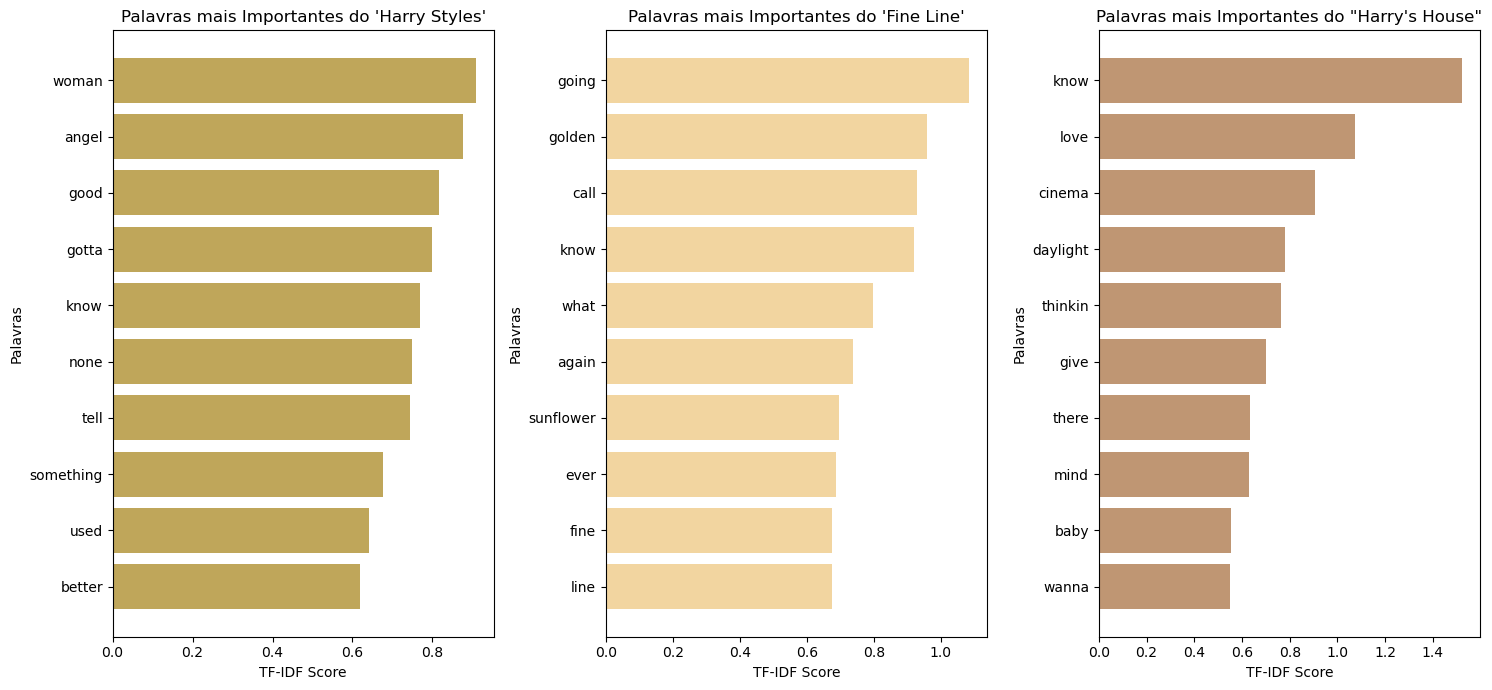

In [28]:
# Obtém as letras das músicas de 2017 e as armazena em uma lista
doc_hs = df[df['release_year'] == 2017].loc[:, 'lyrics'].to_list()
# Calcula a matriz TF-IDF para as letras de 2017
response = tfidf.fit_transform([doc for doc in doc_hs])
# Cria uma lista de tuplas com as palavras e suas respectivas pontuações somadas
scores = zip(tfidf.get_feature_names(), np.asarray(response.sum(axis=0)).ravel())
# Classifica as palavras com base nas pontuações em ordem decrescente
sorted_scores_hs = sorted(scores, key=lambda x: x[1], reverse=True)

# Obtém as letras das músicas de 2019 e as armazena em uma lista
doc_fl = df[df['release_year'] == 2019].loc[:, 'lyrics'].to_list()
# Calcula a matriz TF-IDF para as letras de 2019
response = tfidf.fit_transform([doc for doc in doc_fl])
# Cria uma lista de tuplas com as palavras e suas respectivas pontuações somadas
scores = zip(tfidf.get_feature_names(), np.asarray(response.sum(axis=0)).ravel())
# Classifica as palavras com base nas pontuações em ordem decrescente
sorted_scores_fl = sorted(scores, key=lambda x: x[1], reverse=True)

# Obtém as letras das músicas de 2022 e as armazena em uma lista
doc_hh = df[df['release_year'] == 2022].loc[:, 'lyrics'].to_list()
# Calcula a matriz TF-IDF para as letras de 2022
response = tfidf.fit_transform([doc for doc in doc_hh])
# Cria uma lista de tuplas com as palavras e suas respectivas pontuações somadas
scores = zip(tfidf.get_feature_names(), np.asarray(response.sum(axis=0)).ravel())
# Classifica as palavras com base nas pontuações em ordem decrescente
sorted_scores_hh = sorted(scores, key=lambda x: x[1], reverse=True)

# Define o tamanho da figura
plt.figure(figsize=(15, 7))

# Subplot 1: Gráfico para as palavras mais importantes do álbum 'Harry Styles'
plt.subplot(1, 3, 1)
plt.barh([x[0] for x in sorted_scores_hs[:10]][::-1], [x[1] for x in sorted_scores_hs[:10]][::-1], color='#BFA65A')  
plt.title("Palavras mais Importantes do 'Harry Styles'")
plt.xlabel('TF-IDF Score')
plt.ylabel('Palavras')

# Subplot 2: Gráfico para as palavras mais importantes do álbum 'Fine Line'
plt.subplot(1, 3, 2)
plt.barh([x[0] for x in sorted_scores_fl[:10]][::-1], [x[1] for x in sorted_scores_fl[:10]][::-1], color='#F2D5A0') 
plt.title("Palavras mais Importantes do 'Fine Line'")
plt.xlabel('TF-IDF Score')
plt.ylabel('Palavras')

# Subplot 3: Gráfico para as palavras mais importantes do álbum 'Harry's House'
plt.subplot(1, 3, 3)
plt.barh([x[0] for x in sorted_scores_hh[:10]][::-1], [x[1] for x in sorted_scores_hh[:10]][::-1], color='#BF9673')  
plt.title("Palavras mais Importantes do \"Harry's House\"")
plt.xlabel('TF-IDF Score')
plt.ylabel('Palavras')

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Exibe o gráfico
plt.show()

O gráfico resultante mostra as palavras mais importantes em cada era do Harry Styles utilizando a métrica TF-IDF. Algumas deduções encontradas:

1. **Palavras Comuns e Temáticas**: No primeiro álbum palavras como "woman," "angel," e "good" destacam uma temática que pode estar relacionada a amor, relacionamentos e sentimentos positivos. No segundo disco, palavras como "going," "golden," e "know" sugerem um foco em experiências, transições e autoconhecimento. Por fim, em seu álbum mais recente palavras como "know," "love," e "cinema" podem indicar uma narrativa que envolve intimidade, emoções e reflexões sobre a vida cotidiana.


2. **Diferenciação de Estilo**: Cada álbum parece ter um estilo lírico distinto, refletido nas palavras que se destacam. Isso pode sugerir uma evolução na temática ou na abordagem lírica de Harry Styles ao longo dos anos.


3. **Mudanças de Temática ao Longo dos Álbuns**: Observando as palavras mais importantes, podemos inferir como a narrativa e os temas abordados nas letras evoluíram ao longo dos anos. Isso pode refletir mudanças na vida pessoal do artista, influências externas ou simplesmente um crescimento artístico.

## Análise NRC

O **arquivo NRC** (National Research Council) é um recurso amplamente utilizado na análise de sentimentos, especialmente no contexto de processamento de linguagem natural (PLN) e mineração de texto. O NRC desenvolveu um léxico de sentimentos que categoriza palavras em diferentes emoções, permitindo que pesquisadores e desenvolvedores analisem letras de músicas, resenhas e outros textos em relação a sentimentos específicos.

### Estrutura do Arquivo NRC

O léxico do NRC é estruturado em várias colunas, onde as palavras são associadas a diferentes emoções e sentimentos, incluindo:

- **Alegria**
- **Tristeza**
- **Medo**
- **Raiva**
- **Surpresa**
- **Desprezo**
- **Confiança**
- **Antipatia**

Cada palavra no léxico é marcada como presente ou ausente em relação a essas emoções, permitindo que os usuários quantifiquem e analisem a presença de sentimentos em um texto.

### Aplicações na Análise de Músicas

1. **Identificação de Emoções**:
   - Ao aplicar o léxico NRC às letras de músicas, é possível identificar quais emoções são mais proeminentes em uma canção. Por exemplo, uma letra pode ser classificada como predominantemente alegre, triste ou reflexiva.

2. **Comparação Entre Músicas**:
   - O NRC permite a comparação de diferentes músicas ou álbuns, facilitando a análise de como os sentimentos evoluem ao longo do tempo ou entre diferentes artistas. Essa comparação pode revelar como as temáticas abordadas nas letras mudam conforme a carreira de um artista avança.

3. **Análise de Tendências**:
   - Ao analisar um conjunto de músicas (por exemplo, todas as músicas lançadas em um determinado ano), os pesquisadores podem identificar tendências emocionais na música popular. Isso pode fornecer insights sobre a cultura e os sentimentos coletivos de uma sociedade em um período específico.

4. **Desenvolvimento de Recomendação**:
   - O entendimento dos sentimentos nas músicas pode ajudar a criar sistemas de recomendação mais personalizados, sugerindo músicas com base no estado emocional do ouvinte.

O uso do arquivo NRC na análise de letras de músicas é uma ferramenta poderosa para compreender as emoções expressas na música. Com a capacidade de quantificar sentimentos, pesquisadores e desenvolvedores podem explorar a rica tapeçaria emocional das letras e como elas ressoam com os ouvintes. Essa análise não apenas enriquece nossa compreensão da música como arte, mas também nos oferece uma janela para as emoções humanas e a cultura contemporânea.

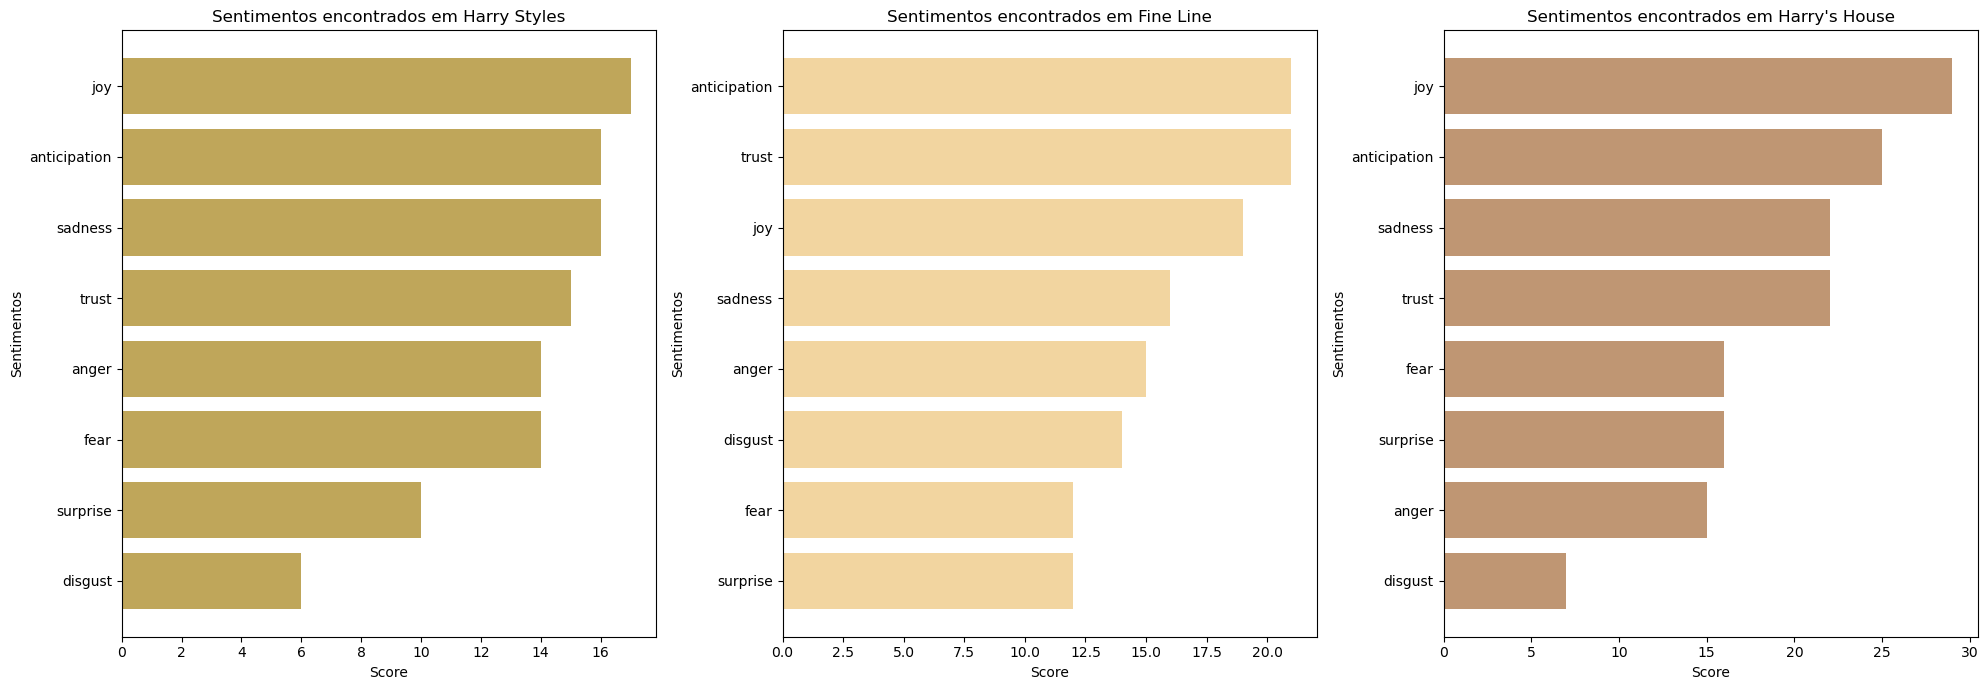

In [31]:
# Lê o arquivo NRC e armazena os dados em um DataFrame, definindo os nomes das colunas.
df_nrc = pd.read_csv("Arquivos Gerados/NRC.tsv", sep='\t', names=['Sentiment', 'Filter', 'Score'])

# Cria um conjunto de palavras únicas presentes na coluna 'Sentiment' do DataFrame NRC.
set_of_nrc_words = df_nrc.loc[:, 'Sentiment'].unique()

# Inicializa conjuntos para armazenar as palavras do NRC para cada álbum.
set_of_nrc_words_hs = set()  # Conjunto para o álbum "Harry Styles"
set_of_nrc_words_fl = set()  # Conjunto para o álbum "Fine Line"
set_of_nrc_words_hh = set()  # Conjunto para o álbum "Harry's House"

# Itera sobre as palavras do álbum "Harry Styles" e adiciona as que estão no conjunto de palavras do NRC.
for word in ' '.join(doc_hs).split(' '):
    if word in set_of_nrc_words:
        set_of_nrc_words_hs.add(word)
                
# Itera sobre as palavras do álbum "Fine Line" e adiciona as que estão no conjunto de palavras do NRC.
for word in ' '.join(doc_fl).split(' '):
    if word in set_of_nrc_words:
        set_of_nrc_words_fl.add(word)
        
# Itera sobre as palavras do álbum "Harry's House" e adiciona as que estão no conjunto de palavras do NRC.
for word in ' '.join(doc_hh).split(' '):
    if word in set_of_nrc_words:
        set_of_nrc_words_hh.add(word)

# Calcula a pontuação do NRC para o álbum "Harry Styles", agrupando por 'Filter' e somando as pontuações.
nrc_score_hs = df_nrc[(df_nrc['Sentiment'].isin(set_of_nrc_words_hs)) & (df_nrc['Score'] == 1)].groupby(['Filter']).sum()
# Ordena os resultados pela pontuação e exclui as duas primeiras linhas.
nrc_score_hs = nrc_score_hs.sort_values(by='Score', ascending=False).iloc[2:, :]

# Calcula a pontuação do NRC para o álbum "Fine Line", agrupando por 'Filter' e somando as pontuações.
nrc_score_fl = df_nrc[(df_nrc['Sentiment'].isin(set_of_nrc_words_fl)) & (df_nrc['Score'] == 1)].groupby(['Filter']).sum()
# Ordena os resultados pela pontuação e exclui as duas primeiras linhas.
nrc_score_fl = nrc_score_fl.sort_values(by='Score', ascending=False).iloc[2:, :]

# Calcula a pontuação do NRC para o álbum "Harry's House", agrupando por 'Filter' e somando as pontuações.
nrc_score_hh = df_nrc[(df_nrc['Sentiment'].isin(set_of_nrc_words_hh)) & (df_nrc['Score'] == 1)].groupby(['Filter']).sum()
# Ordena os resultados pela pontuação e exclui as duas primeiras linhas.
nrc_score_hh = nrc_score_hh.sort_values(by='Score', ascending=False).iloc[2:, :]

# Define o tamanho da figura
plt.figure(figsize=(20, 7))

# Subplot 1: Harry Styles
plt.subplot(1, 3, 1)
plt.barh(nrc_score_hs.index[::-1], [value[0] for value in nrc_score_hs.values][::-1], color='#BFA65A') 
plt.title("Sentimentos encontrados em Harry Styles")
plt.xlabel('Score')
plt.ylabel('Sentimentos')

# Subplot 2: Fine Line
plt.subplot(1, 3, 2)
plt.barh(nrc_score_fl.index[::-1], [value[0] for value in nrc_score_fl.values][::-1], color='#F2D5A0') 
plt.title("Sentimentos encontrados em Fine Line")
plt.xlabel('Score')
plt.ylabel('Sentimentos')

# Subplot 3: Harry's House
plt.subplot(1, 3, 3)
plt.barh(nrc_score_hh.index[::-1], [value[0] for value in nrc_score_hh.values][::-1], color='#BF9673') 
plt.title("Sentimentos encontrados em Harry's House")
plt.xlabel('Score')
plt.ylabel('Sentimentos')

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Exibe o gráfico
plt.show()

Algumas deduções podem ser feitas:

1. **Predominância de Sentimentos**: A alegria (*joy*) e a antecipação (*anticipation*) parecem ser sentimentos proeminentes nos três álbuns, indicando que as letras transmitem positividade e entusiasmo.


2. **Variação de Sentimentos entre os Álbuns**:
   - No álbum *Harry Styles*, há uma distribuição equilibrada entre alegria, antecipação e tristeza, com uma leve presença de confiança e medo.
   - Em *Fine Line*, a alegria é mais destacada, junto com a antecipação e confiança, enquanto desgosto e raiva são menos expressivos.
   - *Harry's House* apresenta uma predominância ainda maior de alegria, além de uma presença significativa de tristeza e medo, sugerindo uma diversidade de sentimentos.
   

3. **Intensidade de Sentimentos**: Em geral, o sentimento de alegria tem o maior score nos álbuns, o que pode indicar uma tendência nas letras para explorar temas mais positivos.

Essas observações indicam que os álbuns de Harry Styles têm uma forte base de sentimentos positivos, mas há nuances e complexidades emocionais que variam entre os álbuns. Isso pode refletir uma evolução no estilo e nas temáticas das letras ao longo de sua carreira.

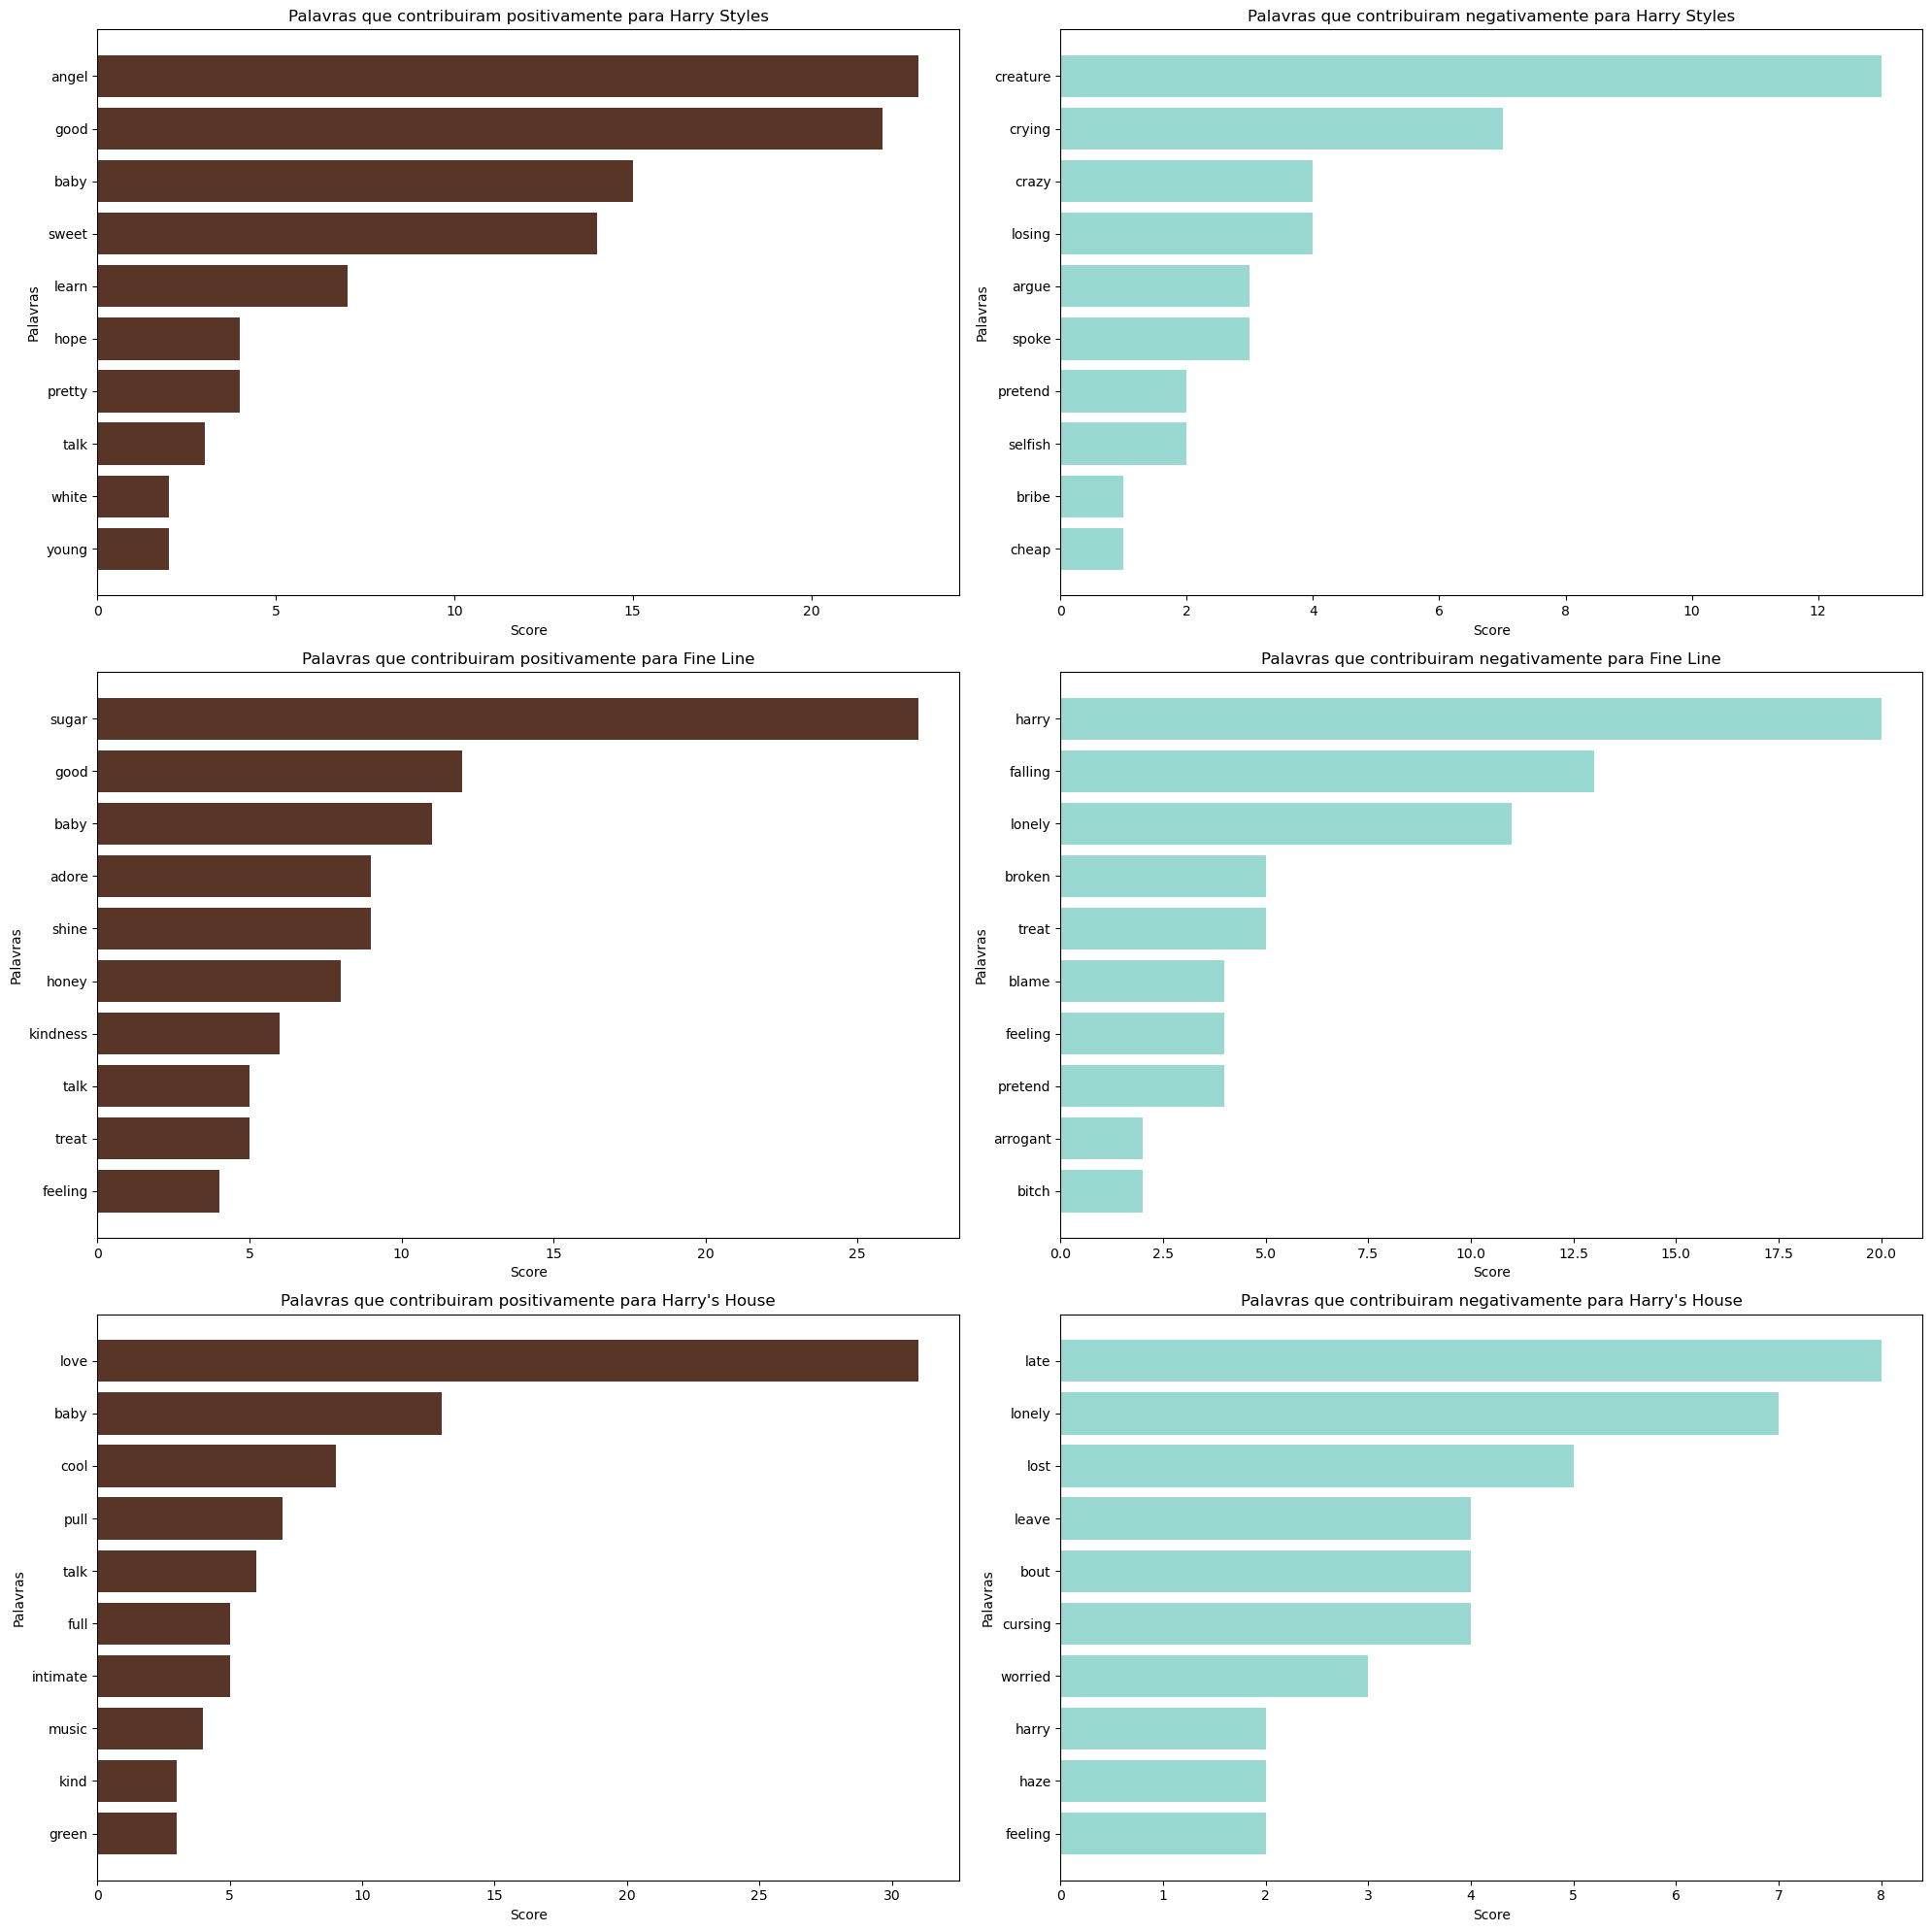

In [32]:
# Filtra as palavras associadas a sentimentos positivos para o álbum "Harry Styles"
words_for_positive_sentiments_hs = df_nrc[
    (df_nrc['Sentiment'].isin(set_of_nrc_words_hs)) &  # Verifica se o sentimento está no conjunto de palavras específicas do álbum
    (df_nrc['Score'] == 1) &                          # Verifica se a pontuação do sentimento é 1 (indicando a presença do sentimento)
    (df_nrc['Filter'] == 'positive')                  # Filtra apenas sentimentos positivos
].loc[:, 'Sentiment'].values

# Filtra as palavras associadas a sentimentos negativos para o álbum "Harry Styles"
words_for_negative_sentiments_hs = df_nrc[
    (df_nrc['Sentiment'].isin(set_of_nrc_words_hs)) & 
    (df_nrc['Score'] == 1) & 
    (df_nrc['Filter'] == 'negative')                  # Filtra apenas sentimentos negativos
].loc[:, 'Sentiment'].values

# Repetição dos filtros acima para o álbum "Fine Line"
words_for_positive_sentiments_fl = df_nrc[
    (df_nrc['Sentiment'].isin(set_of_nrc_words_fl)) & 
    (df_nrc['Score'] == 1) & 
    (df_nrc['Filter'] == 'positive')
].loc[:, 'Sentiment'].values

words_for_negative_sentiments_fl = df_nrc[
    (df_nrc['Sentiment'].isin(set_of_nrc_words_fl)) & 
    (df_nrc['Score'] == 1) & 
    (df_nrc['Filter'] == 'negative')
].loc[:, 'Sentiment'].values

# Repetição dos filtros acima para o álbum "Harry's House"
words_for_positive_sentiments_hh = df_nrc[
    (df_nrc['Sentiment'].isin(set_of_nrc_words_hh)) & 
    (df_nrc['Score'] == 1) & 
    (df_nrc['Filter'] == 'positive')
].loc[:, 'Sentiment'].values

words_for_negative_sentiments_hh = df_nrc[
    (df_nrc['Sentiment'].isin(set_of_nrc_words_hh)) & 
    (df_nrc['Score'] == 1) & 
    (df_nrc['Filter'] == 'negative')
].loc[:, 'Sentiment'].values

# Dicionários para contar a frequência de palavras positivas e negativas em cada álbum
positive_count_hs = dict()
negative_count_hs = dict()

positive_count_fl = dict()
negative_count_fl = dict()

positive_count_hh = dict()
negative_count_hh = dict()

# Contagem de palavras positivas para o álbum "Harry Styles"
for word in ' '.join(doc_hs).split(' '):
    if word in words_for_positive_sentiments_hs:
        if word in positive_count_hs.keys():
            positive_count_hs[word] += 1
        else:
            positive_count_hs[word] = 1

# Contagem de palavras negativas para o álbum "Harry Styles"
for word in ' '.join(doc_hs).split(' '):
    if word in words_for_negative_sentiments_hs:
        if word in negative_count_hs.keys():
            negative_count_hs[word] += 1
        else:
            negative_count_hs[word] = 1

# Contagem de palavras positivas para o álbum "Fine Line"
for word in ' '.join(doc_fl).split(' '):
    if word in words_for_positive_sentiments_fl:
        if word in positive_count_fl.keys():
            positive_count_fl[word] += 1
        else:
            positive_count_fl[word] = 1

# Contagem de palavras negativas para o álbum "Fine Line"
for word in ' '.join(doc_fl).split(' '):
    if word in words_for_negative_sentiments_fl:
        if word in negative_count_fl.keys():
            negative_count_fl[word] += 1
        else:
            negative_count_fl[word] = 1

# Contagem de palavras positivas para o álbum "Harry's House"
for word in ' '.join(doc_hh).split(' '):
    if word in words_for_positive_sentiments_hh:
        if word in positive_count_hh.keys():
            positive_count_hh[word] += 1
        else:
            positive_count_hh[word] = 1

# Contagem de palavras negativas para o álbum "Harry's House"
for word in ' '.join(doc_hh).split(' '):
    if word in words_for_negative_sentiments_hh:
        if word in negative_count_hh.keys():
            negative_count_hh[word] += 1
        else:
            negative_count_hh[word] = 1

# Seleciona as 10 palavras positivas mais frequentes para o álbum "Harry Styles"
positive_x_hs = sorted(positive_count_hs, key=positive_count_hs.get, reverse=True)[:10]
positive_y_hs = [positive_count_hs.get(key) for key in sorted(positive_count_hs, key=positive_count_hs.get, reverse=True)][:10]

# Seleciona as 10 palavras negativas mais frequentes para o álbum "Harry Styles"
negative_x_hs = sorted(negative_count_hs, key=negative_count_hs.get, reverse=True)[:10]
negative_y_hs = [negative_count_hs.get(key) for key in sorted(negative_count_hs, key=negative_count_hs.get, reverse=True)][:10]

# Seleciona as 10 palavras positivas mais frequentes para o álbum "Fine Line"
positive_x_fl = sorted(positive_count_fl, key=positive_count_fl.get, reverse=True)[:10]
positive_y_fl = [positive_count_fl.get(key) for key in sorted(positive_count_fl, key=positive_count_fl.get, reverse=True)][:10]

# Seleciona as 10 palavras negativas mais frequentes para o álbum "Fine Line"
negative_x_fl = sorted(negative_count_fl, key=negative_count_fl.get, reverse=True)[:10]
negative_y_fl = [negative_count_fl.get(key) for key in sorted(negative_count_fl, key=negative_count_fl.get, reverse=True)][:10]

# Seleciona as 10 palavras positivas mais frequentes para o álbum "Harry's House"
positive_x_hh = sorted(positive_count_hh, key=positive_count_hh.get, reverse=True)[:10]
positive_y_hh = [positive_count_hh.get(key) for key in sorted(positive_count_hh, key=positive_count_hh.get, reverse=True)][:10]

# Seleciona as 10 palavras negativas mais frequentes para o álbum "Harry's House"
negative_x_hh = sorted(negative_count_hh, key=negative_count_hh.get, reverse=True)[:10]
negative_y_hh = [negative_count_hh.get(key) for key in sorted(negative_count_hh, key=negative_count_hh.get, reverse=True)][:10]

# Define o tamanho da figura
plt.figure(figsize=(20, 20))

# Subplot 1: Positive sentiments for Harry Styles
plt.subplot(3, 2, 1)
plt.barh(positive_x_hs[::-1], positive_y_hs[::-1], color='#593528')
plt.title("Palavras que contribuiram positivamente para Harry Styles")
plt.xlabel('Score')
plt.ylabel('Palavras')

# Subplot 2: Negative sentiments for Harry Styles
plt.subplot(3, 2, 2)
plt.barh(negative_x_hs[::-1], negative_y_hs[::-1], color='#9AD9D2')
plt.title("Palavras que contribuiram negativamente para Harry Styles")
plt.xlabel('Score')
plt.ylabel('Palavras')

# Subplot 3: Positive sentiments for Fine Line
plt.subplot(3, 2, 3)
plt.barh(positive_x_fl[::-1], positive_y_fl[::-1], color='#593528')
plt.title("Palavras que contribuiram positivamente para Fine Line")
plt.xlabel('Score')
plt.ylabel('Palavras')

# Subplot 4: Negative sentiments for Fine Line
plt.subplot(3, 2, 4)
plt.barh(negative_x_fl[::-1], negative_y_fl[::-1], color='#9AD9D2')
plt.title("Palavras que contribuiram negativamente para Fine Line")
plt.xlabel('Score')
plt.ylabel('Palavras')

# Subplot 5: Positive sentiments for Harry's House
plt.subplot(3, 2, 5)
plt.barh(positive_x_hh[::-1], positive_y_hh[::-1], color='#593528')
plt.title("Palavras que contribuiram positivamente para Harry's House")
plt.xlabel('Score')
plt.ylabel('Palavras')

# Subplot 6: Negative sentiments for Harry's House
plt.subplot(3, 2, 6)
plt.barh(negative_x_hh[::-1], negative_y_hh[::-1], color='#9AD9D2')
plt.title("Palavras que contribuiram negativamente para Harry's House")
plt.xlabel('Score')
plt.ylabel('Palavras')

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Exibe o gráfico
plt.show()

### 1. Gráficos das Palavras com Sentimentos Positivos e Negativos para "Harry Styles"
   - **Palavras Positivas**: A lista de palavras positivas mais frequentes indica os termos que mais contribuem para o tom positivo do álbum "Harry Styles". Isso pode sugerir que o álbum possui temas repetidos ou palavras associadas a emoções positivas específicas, como alegria, confiança ou esperança.
   - **Palavras Negativas**: As palavras negativas mais comuns podem indicar os temas ou emoções negativas que o álbum aborda. Esse gráfico revela os aspectos melancólicos ou preocupações recorrentes nas letras, fornecendo uma perspectiva mais completa sobre o tom do álbum.

### 2. Gráficos das Palavras com Sentimentos Positivos e Negativos para "Fine Line"
   - **Palavras Positivas**: A presença de palavras positivas específicas sugere o foco emocional do álbum, revelando temas importantes ou sentimentos dominantes nas letras de "Fine Line". Comparando com o álbum "Harry Styles", é possível ver se o artista manteve ou alterou o estilo emocional entre os dois trabalhos.
   - **Palavras Negativas**: O gráfico de palavras negativas para "Fine Line" destaca as emoções ou temas negativos presentes. A comparação com as palavras negativas de "Harry Styles" pode mostrar se "Fine Line" é mais introspectivo, mais melancólico ou aborda temas mais sombrios do que o trabalho anterior.

### 3. Gráficos das Palavras com Sentimentos Positivos e Negativos para "Harry's House"
   - **Palavras Positivas**: Esse gráfico mostra os principais termos positivos usados no álbum "Harry's House". Pode ser que algumas palavras estejam em comum com os outros álbuns, mostrando uma consistência no tom emocional do artista, ou que haja novas palavras, indicando uma mudança temática.
   - **Palavras Negativas**: As palavras negativas de "Harry's House" indicam os temas e emoções mais pesadas ou desafiadoras abordadas nas letras. Ao comparar com os outros álbuns, pode-se ver se "Harry's House" segue uma linha mais otimista ou se se tornou mais introspectivo e complexo em termos de emoções negativas.

### Interpretações e Comparações Gerais
   - **Consistência ou Evolução de Temas**: Ao comparar os gráficos entre os álbuns, é possível ver se o artista tem uma abordagem consistente para os temas positivos e negativos ao longo de sua carreira ou se evoluiu para explorar diferentes aspectos emocionais.
   - **Foco Emocional e Temático**: Cada álbum pode ter um equilíbrio diferente entre palavras positivas e negativas, sugerindo uma mudança de foco. Um álbum com mais palavras positivas pode ser visto como mais otimista, enquanto um com mais palavras negativas pode refletir um tom mais sombrio ou introspectivo.
   - **Destaque de Temas Repetidos**: As palavras mais frequentes em cada álbum, tanto positivas quanto negativas, podem destacar temas recorrentes na carreira do artista, como o amor, perda, esperança ou solidão.

Essas observações podem ajudar a traçar um perfil emocional dos álbuns de Harry Styles e a entender a evolução temática e emocional de suas letras ao longo do tempo.